In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import pims
import trackpy as tp
import cv2
import glob
from PIL import Image
import seaborn as sns

Frame 192: 433 trajectories present.
Filter trajectories with spurious movement


Minimum number of frames to quantify trajectory for a cell : 20


Before: 2625
After: 1163
Plot trajectories


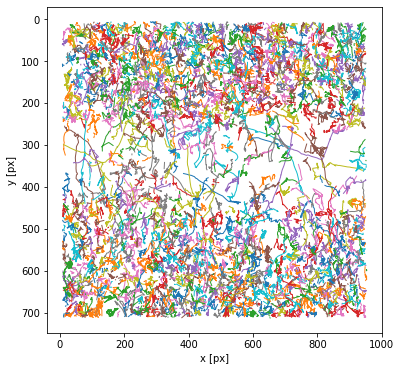

<Figure size 432x432 with 0 Axes>

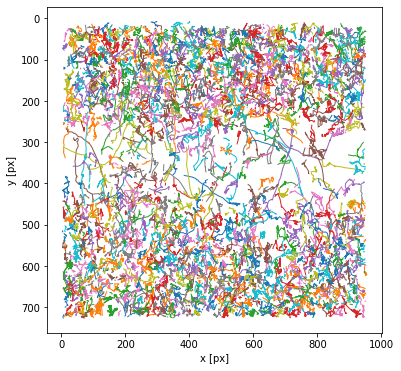

"\n# Filter total distance\ndist_threshold = int(input('Input distance traveled threshold'))\nabv_thres = []\ndistances = []\nfor i in tm['particle'].unique():\n    subset = tm.loc[tm['particle']== i]\n    min_frame = np.min(subset['frame'])\n    max_frame = np.max(subset['frame'])\n    x_min = float(subset.loc[subset['frame']==min_frame,'x'])\n    x_max = float(subset.loc[subset['frame']==max_frame,'x'])\n    y_min = float(subset.loc[subset['frame']==min_frame,'y'])\n    y_max = float(subset.loc[subset['frame']==max_frame,'y'])\n    dx=np.square(x_max-x_min)\n    dy=np.square(y_max-y_min)\n    dist=np.sqrt(dx+dy)\n    \n    if dist >= dist_threshold:\n        abv_thres.append(i)\n        distances.append(dist)\n        \ntm_filtered = tm[tm.particle.isin(abv_thres)]\ntm_filtered['particle'].nunique()\n"

In [2]:
# Master script

type_ = input('Is is this a movie or folder of images? Please answer movie or images :' ).lower()

if type_ == 'movie':
            
    # Import movie and get frames
    vidcap = cv2.VideoCapture('movie_folder/videos.mp4') # Define specific folder
    success,image1 = vidcap.read()
    image_list = []
    count = 0

    
    # Select color channel
    color = input('What color channel are you analyzing? (red, green, blue, all)')
    color = color.lower()

    if color == 'red':
        color = 'r'
    elif color == 'green':
        color = 'g'
    elif color == 'blue':
        color = 'b'
    elif color == 'all':
        color = 'all'
    else:
        raise Exception(f"color should be red(r), green(g), blue(b), or all. The value of color was {chann_color}")
    print(color)


    # set threshold
    thresh = int(input("Select starting threshold for creating white and black image (cells will be white, range 0-255)"))

    #If red channel, select red images
    if color == 'r':
        image = image1[:,:,2]
        (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
        
    #If red channel, select red images
    elif color == 'g':
        image = image1[:,:,1]
        (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

    #If blue channel, select red images
    elif color == 'b':
        image = image1[:,:,0]
        (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

    #If all channels, select red images
    elif color == 'all':
        image = image1[:,:]
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        (_, bw) = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)

            
    else:
        raise Exception(f"color should be red(r), green(g), blue(b), or all. The value of color was {color}")

    plt.figure()
    plt.imshow(bw, plt.get_cmap('gray'))
    plt.show()

    ok = input('Is this threshold OK? (yes or no)')
    ok = ok.lower()

    while ok != 'yes':
        try:
            # set threshold
            thresh = int(input("Select starting threshold for creating white and black image (cells will be white, range 0-255)"))

            #If red channel, select red images
            if color == 'r':
                image = image1[:,:,2]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

            #If red channel, select red images
            elif color == 'g':
                image = image1[:,:,1]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

            #If blue channel, select red images
            elif color == 'b':
                image = image1[:,:,0]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

            #If all channels, select red images
            elif color == 'all':
                image = image1[:,:]
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                (_, bw) = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)

            plt.figure()
            plt.imshow(bw, plt.get_cmap('gray'))
            plt.show()

            ok = input('Is this threshold OK? (yes or no)')
            ok = ok.lower()

        except:
            raise Exception("Something went wrong while re-trying threshold")
            
    #Append because vidcap will call the next image when called again
    image_list.append(bw)

    print('good job')

    while success:
        success,image = vidcap.read()
        count += 1
        try:
         #If red channel, select red images
            if color == 'r':
                image = image[:,:,2]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
                image_list.append(bw)
        
            #If red channel, select red images
            elif color == 'g':
                image = image[:,:,1]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
                image_list.append(bw)
            
            #If blue channel, select red images
            elif color == 'b':
                image = image[:,:,0]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
                image_list.append(bw)
            
            #If all channels, select red images
            elif color == 'all':
                image = image[:,:]
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                (_, bw) = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)
                image_list.append(bw)
            
            else:
                raise Exception(f"color should be red(r), green(g), blue(b), or all. The value of color was {color}")
            
        except:
            print(f"No image was grabbed for image {count}")
            break

    image_series = input('Would you like to see the first 9 frames? :').lower()
    
    if image_series == 'yes':
        # Plot subplots of figures
        plt.figure(figsize=(10,10))
        for i in range(9):
            # define subplot
            plt.subplot(330 + 1 + i)
            # convert to unsigned integers for viewing
            image = image_list[i].astype('uint8')
            # plot raw pixel data
            plt.imshow(image, plt.get_cmap('gray'))

if type_ == 'images':
    
    #Get images
    image_list=[]
    images = []
    files = glob.glob("orig_movie/*.png") # Define specific file path
    names = np.asanyarray([file for file in files])
    file_num = np.reshape(np.asanyarray([int(''.join(filter(str.isdigit, name))) for name in names]),(-1,1))
    names = names.reshape((-1,1))
    name_files = np.hstack((names,file_num))
    name_files = name_files[np.argsort(name_files[:,1])]
    for file in name_files[:,0]:
        image = np.array(Image.open(file))
        images.append(image)
    
    # Select color channel
    color = input('What color channel are you analyzing? (red, green, blue, all)')
    color = color.lower()

    if color == 'red':
        color = 'r'
    elif color == 'green':
        color = 'g'
    elif color == 'blue':
        color = 'b'
    elif color == 'all':
        pass
    else:
        raise Exception(f"color should be red(r), green(g), blue(b), or all. The value of color was {chann_color}")
    print(color)


    # set threshold
    thresh = int(input("Select starting threshold for creating white and black image (cells will be white, range 0-255)"))

    if len(images[0].shape) == 3:
        
        #If red channel, select red images
        if color == 'r':
            image = images[0][:,:,2]
            (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

        #If green channel, select green images
        elif color == 'g':
            image = image[0][:,:,1]
            (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

        #If blue channel, select blue images
        elif color == 'b':
            image = images[0][:,:,0]
            (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

        #If all channels, select all images
        elif color == 'all':
            image = images[0][:,:]
            (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

        else:
            raise Exception(f"color should be red(r), green(g), blue(b), or all. The value of color was {color}")
            
    elif len(images[0].shape) < 3:
        image = images[0][:,:]
        (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
        
    else: 
        raise Exception(f"Something is wrong with the shape of the data")
        
    fig = plt.figure(figsize=(8,8))
    plt.imshow(bw, plt.get_cmap('gray'))
    plt.show()
    plt.close(fig)
    ok = input('Is this threshold OK? (yes or no)')
    ok = ok.lower()

    
    while ok != 'yes':
        try:
            # set threshold
            thresh = int(input("Select starting threshold for creating white and black image (cells will be white, range 0-255)"))

            if len(images[0].shape) == 3:
                
                #If red channel, select red images
                if color == 'r':
                    image = images[0][:,:,2]
                    (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

                #If red channel, select red images
                elif color == 'g':
                    image = image[0][:,:,1]
                    (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

                #If blue channel, select red images
                elif color == 'b':
                    image = images[0][:,:,0]
                    (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

                #If all channels, select red images
                elif color == 'all':
                    image = images[0][:,:]
                    (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
                    
            if len(images[0].shape) < 3:
                image = images[0][:,:]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

            fig = plt.figure(figsize=(8,8))
            plt.imshow(bw, plt.get_cmap('gray'))
            plt.show()
            plt.close(fig)

            ok = input('Is this threshold OK? (yes or no)')
            ok = ok.lower()

        except:
            raise Exception("Something went wrong while re-trying threshold")
    
    #If yes, go through all images and append
    if len(images[0].shape) == 3:
        for i in range(0,len(images)):
            #If red channel, select red images
            if color == 'r':
                image = images[i][:,:,2]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
                image_list.append(bw)

            #If red channel, select red images
            elif color == 'g':
                image = images[i][:,:,1]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
                image_list.append(bw)

            #If blue channel, select red images
            elif color == 'b':
                image = images[i][:,:,0]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
                image_list.append(bw)

            #If all channels, select red images
            elif color == 'all':
                image = images[i][:,:]
                (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
                image_list.append(bw)
                    
            else:
                raise Exception("Error in batch processing color channels")
                    
                    
    elif len(image[0].shape) < 3:
        for i in range(0,len(images)):
            image = images[i][:,:]
            (_, bw) = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
            image_list.append(bw)
                
    else:
        raise Exception('Error in confirming shape for batch processing')
    
    image_series = input('Would you like to see the first 9 frames? :').lower()
    
    if image_series == 'yes':
        # Plot subplots of figures
        plt.figure(figsize=(10,10))
        for i in range(9):
            # define subplot
            plt.subplot(330 + 1 + i)
            # convert to unsigned integers for viewing
            image = image_list[i].astype('uint8')
            # plot raw pixel data
            plt.imshow(image, plt.get_cmap('gray'))
            


#Annotate images
mass = 0
diam = 21
f = tp.locate(image_list[0], diameter=diam, minmass=mass, invert=True)

plt.figure()  # make a new figure
tp.annotate(f, image_list[0])
plt.close()

fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')
plt.show()
plt.close()

input_ = input('Would you like to set a new minimum mass and diameter threshold? (yes or no) :').lower()
    
while input_ != 'no':
    try:
        mass, diam = map(int, input('Set minimum mass and diameter threshold (current is 21, max is 25). First number is mass, second is diameter :').split())
        #Annotate images
        f = tp.locate(image_list[0], diameter=diam, minmass=mass, invert=True)
        #Plot annotation
        plt.figure()  # make a new figure
        tp.annotate(f, image_list[0]);
        plt.close()
        input_ = input('Would you like to set a new minimum mass? (yes or no) :').lower()
            
    except:
        print("Something went wrong while re-trying threshold. Make sure to type in both numbers")
        continue   

#Annotate all images

f = tp.batch(image_list, diameter=diam, minmass=mass)

#Link the trajectories 

linking = 'fail'
while linking != 'success':
    try:
        search_range = int(input('Please indicate the maximum distance a cell can travel between frames'))
        t = tp.link_df(f, search_range, memory=5)
        linking = 'success'
    except:
        print('Something went wrong. Search range may be too big')

print('Filter trajectories with spurious movement')
min_traj = int(input('Minimum number of frames to quantify trajectory for a cell :'))
t1 = tp.filter_stubs(t, min_traj)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

print('Plot trajectories')
plt.figure(figsize=(6,6))
t1 = t1.reset_index(drop='True')
tp.plot_traj(t1)
plt.close()

plt.figure(figsize=(6,6))
d = tp.compute_drift(t1)
d.plot()
plt.close()

plt.figure(figsize=(6,6))
tm = tp.subtract_drift(t1.copy(), d)
ax = tp.plot_traj(tm)
plt.show()
plt.close


#Initiate speed list
speed = {}
frame = {}

#Calculate seconds between frames
seconds = (120/len(image_list))*60

for particle in np.unique(tm['particle']):
    subset = tm[tm['particle'] == particle].reset_index(drop=True)
    subset = subset.sort_values('frame')
    subset = subset.set_index('frame').T
   
    speed_list = []
    frame_list = []
    for i in range(1,len(image_list)):
        try:
            dist=np.sqrt(np.sum((subset[:2][i] - subset[:2][i-1])**2))
            s = (dist/seconds)*60
            speed_list.append(s)
            frame_list.append(i)
        except Exception:
            pass
           
    speed[f'{particle}'] = speed_list
    frame[f'{particle}'] = frame_list
            
speeds = []
frames = []
particles = []

for i in speed.keys():
    speeds += list(speed[i])
    frames += list(frame[i])
    for j in range(0,len(speed[i])):
        particles.append(i)
        
# Dataframe of scaled coordinates 
speed_df = pd.DataFrame.from_dict({'u_min': speeds, 'frame':frames, 'particle':particles}) 

#Ask for starting threshold
"""
# Filter total distance
dist_threshold = int(input('Input distance traveled threshold'))
abv_thres = []
distances = []
for i in tm['particle'].unique():
    subset = tm.loc[tm['particle']== i]
    min_frame = np.min(subset['frame'])
    max_frame = np.max(subset['frame'])
    x_min = float(subset.loc[subset['frame']==min_frame,'x'])
    x_max = float(subset.loc[subset['frame']==max_frame,'x'])
    y_min = float(subset.loc[subset['frame']==min_frame,'y'])
    y_max = float(subset.loc[subset['frame']==max_frame,'y'])
    dx=np.square(x_max-x_min)
    dy=np.square(y_max-y_min)
    dist=np.sqrt(dx+dy)
    
    if dist >= dist_threshold:
        abv_thres.append(i)
        distances.append(dist)
        
tm_filtered = tm[tm.particle.isin(abv_thres)]
tm_filtered['particle'].nunique()
"""

Input distance traveled threshold 50


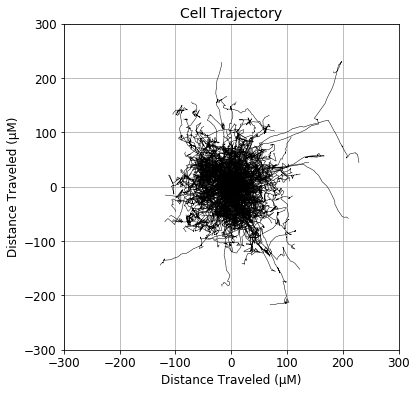

Would you like to reset the distance threshold? yes
Input distance traveled threshold 80


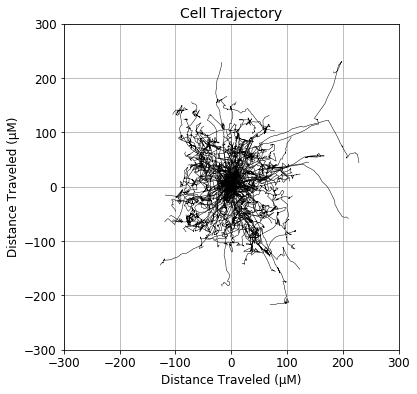

Would you like to reset the distance threshold? no


In [3]:
# Filter total distance
dist_threshold = int(input('Input distance traveled threshold'))
abv_thres = []
distances = []
for i in tm['particle'].unique():
    subset = tm.loc[tm['particle']== i]
    min_frame = np.min(subset['frame'])
    max_frame = np.max(subset['frame'])
    x_min = float(subset.loc[subset['frame']==min_frame,'x'])
    x_max = float(subset.loc[subset['frame']==max_frame,'x'])
    y_min = float(subset.loc[subset['frame']==min_frame,'y'])
    y_max = float(subset.loc[subset['frame']==max_frame,'y'])
    dx=np.square(x_max-x_min)
    dy=np.square(y_max-y_min)
    dist=np.sqrt(dx+dy)
    
    if dist >= dist_threshold:
        abv_thres.append(i)
        distances.append(dist)
        
tm_filtered = tm[tm.particle.isin(abv_thres)]
tm_filtered['particle'].nunique()

#Scale df

x_new = []
y_new = []
frame = []
particle_ = []

for i in tm_filtered['particle'].unique():
    subset = tm_filtered[tm_filtered['particle']== i].reset_index(drop=True)
    subset = subset = subset.sort_values('frame').reset_index(drop=True)
    scale_x = subset['x'][0]
    scale_y = subset['y'][0]
    subset['x_scaled'] = subset['x']-scale_x
    subset['y_scaled'] = subset['y']-scale_y
    x_new += list(subset['x_scaled'])
    y_new += list(subset['y_scaled'])
    frame += list(subset['frame'])
    particle_ += list(subset['particle'])

# Dataframe of scaled coordinates 
tm_scaled = pd.DataFrame.from_dict({'x_scaled': x_new, 'y_scaled':y_new, 'frame': frame, 'particle':particle_}) 

plt.figure(figsize=(6, 6))
plt.rcParams["font.size"] = 12
for i in tm_scaled['particle'].unique():
    subset = tm_scaled[tm_scaled['particle']== i]
    plt.plot(subset['x_scaled'], subset['y_scaled'], '-', linewidth=.5, color='black')
    plt.xlim(-300,300)
    plt.ylim(-300,300)
    
    plt.title('Cell Trajectory', fontdict={'fontsize': 14})
    plt.xlabel("Distance Traveled " u"(\u03bcM)")
    plt.ylabel("Distance Traveled " u"(\u03bcM)")
    
    plt.grid(True)
plt.show()
input_ = input('Would you like to reset the distance threshold?').lower()
plt.close()
while input_ != 'no':
    try:
        # Filter total distance
        dist_threshold = int(input('Input distance traveled threshold'))
        abv_thres = []
        distances = []
        for i in tm['particle'].unique():
            subset = tm.loc[tm['particle']== i]
            min_frame = np.min(subset['frame'])
            max_frame = np.max(subset['frame'])
            x_min = float(subset.loc[subset['frame']==min_frame,'x'])
            x_max = float(subset.loc[subset['frame']==max_frame,'x'])
            y_min = float(subset.loc[subset['frame']==min_frame,'y'])
            y_max = float(subset.loc[subset['frame']==max_frame,'y'])
            dx=np.square(x_max-x_min)
            dy=np.square(y_max-y_min)
            dist=np.sqrt(dx+dy)

            if dist >= dist_threshold:
                abv_thres.append(i)
                distances.append(dist)

        tm_filtered = tm[tm.particle.isin(abv_thres)]
        tm_filtered['particle'].nunique()

        #Scale df

        x_new = []
        y_new = []
        frame = []
        particle_ = []

        for i in tm_filtered['particle'].unique():
            subset = tm_filtered[tm_filtered['particle']== i].reset_index(drop=True)
            subset = subset = subset.sort_values('frame').reset_index(drop=True)
            scale_x = subset['x'][0]
            scale_y = subset['y'][0]
            subset['x_scaled'] = subset['x']-scale_x
            subset['y_scaled'] = subset['y']-scale_y
            x_new += list(subset['x_scaled'])
            y_new += list(subset['y_scaled'])
            frame += list(subset['frame'])
            particle_ += list(subset['particle'])

        # Dataframe of scaled coordinates 
        tm_scaled = pd.DataFrame.from_dict({'x_scaled': x_new, 'y_scaled':y_new, 'frame': frame, 'particle':particle_}) 

        plt.figure(figsize=(6, 6))
        plt.rcParams["font.size"] = 12
        for i in tm_scaled['particle'].unique():
            subset = tm_scaled[tm_scaled['particle']== i]
            plt.plot(subset['x_scaled'], subset['y_scaled'], '-', linewidth=.5, color='black')
            plt.xlim(-300,300)
            plt.ylim(-300,300)

            plt.title('Cell Trajectory', fontdict={'fontsize': 14})
            plt.xlabel("Distance Traveled " u"(\u03bcM)")
            plt.ylabel("Distance Traveled " u"(\u03bcM)")
            plt.grid(True)
            
        plt.show()
        plt.close()
        input_ = input('Would you like to reset the distance threshold?').lower()
        break
        
    except:
        print('Something went wrong. Try again')


In [32]:
# Convert column to int for filtering
speed_df['particle'] = speed_df['particle'].astype(int)

#Filter speed df by particles
speed_df_filt = speed_df[speed_df.particle.isin(abv_thres)]

In [199]:
#Make gif of images
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "arial"

for frame in range(0,tm_scaled['frame'].nunique()):
    
    fig = plt.figure(figsize=(9,7))
    gs = fig.add_gridspec(nrows=2, ncols=2,wspace=0.3, hspace=0.3, width_ratios=[2, 2])
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[1,:])
    fig.suptitle('Cell Migration Trajectory Measurement (Distance Threshold = 80 ' u"\u03bcM)", 
                 fontsize=14, 
                 fontweight='bold', 
                 va='top', 
                 ha='center',
                 y = 0.96,
                 x = 0.45)
    
    t2 = tm_scaled[tm_scaled['frame'] <= frame]
    speed_subset = speed_df_filt[speed_df_filt['frame'] <= frame]
    avg_speed = np.round(np.average(speed_subset['u_min']),2)
    
    ax1.imshow(mov_list[frame])
    ax1.axis('off')
    ax1.set_title('Raw Video', fontdict={'fontsize': 12, 'fontweight': 'bold'}, loc='left')
    
    for particle in t2['particle'].unique():
        subset = t2[t2['particle'] == particle]
            
        if subset['particle'].shape[0] != 0:
            ax2.plot(subset['x_scaled'], subset['y_scaled'], '-', linewidth=.5, color='black')
            ax2.set_xlim(-250,250)
            ax2.set_ylim(-250,250)
    
            ax2.set_title('Cell Trajectory', fontdict={'fontsize': 12, 'fontweight': 'bold'}, loc='left')
            ax2.set_xlabel("Distance Traveled X " u"(\u03bcM)")
            ax2.set_ylabel("Distance Traveled Y " u"(\u03bcM)")
    
            ax2.grid(True)
            #plt.tight_layout()
        else:
            pass
        
    sns.lineplot(x=speed_subset['frame'], y=speed_subset['u_min'], ax=ax3, color='#F75252')
    ax3.set_ylabel('Average Speed ' u"(\u03bcM per min)")
    ax3.set_xlim(0,195)
    ax3.set_ylim(0,12)
    ax3.set_xlabel('Frame')
    ax3.set_title('Average Speed', fontdict={'fontsize': 12, 'fontweight': 'bold'}, loc='left')
    
    if frame % 50 ==0:
        print(f"figure {frame} completed") 
    plt.savefig(f"gif/image_{frame}.png", dpi=200)
    plt.close()


figure 0 completed
figure 50 completed
figure 100 completed
figure 150 completed


In [112]:
# Import movie and get frames
mov_list = []
vidcap = cv2.VideoCapture('movie_folder/videos.mp4') # Define specific folder
success,image = vidcap.read()
count = 0
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mov_list.append(image)
while success:
    try:
        success,image = vidcap.read()
        count += 1
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mov_list.append(image)
    except:
        print(f'There is no array for image {count}')
    

There is no array for image 193


In [200]:
#Create movie
import re
import cv2
import numpy as np
import glob


img_array = []
file_name = 'gif/image_'
file_num = []
files = []
for filename in glob.glob('gif/*.png'):
    #extract image number
    num = int(re.search(r'\d+', filename).group())
    file_num.append(num)
    file_num.sort()

for num in file_num:
    file = file_name + str(num) + '.png'
    files.append(file)

for filename in files:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 19, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
    
out.release()


In [113]:
#Create gif
import os
import imageio as io
images = []
path = 'gif/'
gif_name = 'migration_8.29.2019'
for i in range (0,len(glob.glob1(path, '*.png'))):
    if i < 10:
        string = f'image_{i}.png'
        file = os.path.join(path, string)
        image = io.imread(file)
        images.append(image)
    elif i < 100:
        string = f'image_{i}.png'
        file = os.path.join(path, string)
        image = io.imread(file)
        images.append(image)
    else:
        string = f'image_{i}.png'
        file = os.path.join(path, string)
        image = io.imread(file)
        images.append(image)

io.mimsave(f'gif/{gif_name}.gif',images,fps=19)